In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('YS_data.csv')

In [5]:
df.head()

,Transverse speed (mm/min),Tool rotational speed (rpm),YS\n(MPa)
0,45,540,85.5
1,54,540,80.1
2,63,540,81.9
3,45,720,73.8
4,54,720,82.8


In [6]:
## Find Out the Shape of the Dataset
df.shape

(29, 3)

In [7]:
## Check for Missing Values or null values in the dataset
df.isnull().sum()

Transverse speed (mm/min)      0
Tool rotational speed (rpm)    0
YS\n(MPa)                      0
dtype: int64

In [8]:
df.describe()

,Transverse speed (mm/min),Tool rotational speed (rpm),YS\n(MPa)
count,29.000000,29.000000,29.000000
mean,54.620690,844.137931,113.368966
std,16.996667,160.301440,24.680922
min,27.000000,540.000000,73.800000
25%,45.000000,720.000000,85.500000
50%,54.000000,900.000000,117.000000
75%,63.000000,900.000000,131.400000
max,81.000000,1080.000000,160.200000


In [9]:
## Find out the Corelation between various features in the dataset
df.corr()

,Transverse speed (mm/min),Tool rotational speed (rpm),YS\n(MPa)
Transverse speed (mm/min),1.000000,0.055651,-0.124082
Tool rotational speed (rpm),0.055651,1.000000,0.650302
YS\n(MPa),-0.124082,0.650302,1.000000


In [10]:
## Represent the above corelation in a visualized format using seaborn library

import seaborn as sns

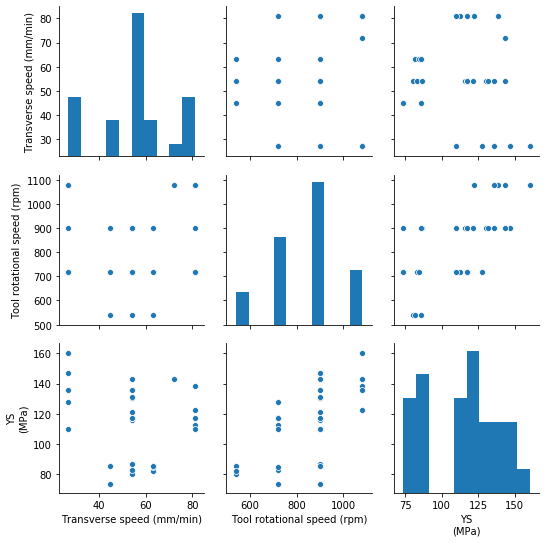

In [11]:
sns.pairplot(df)

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

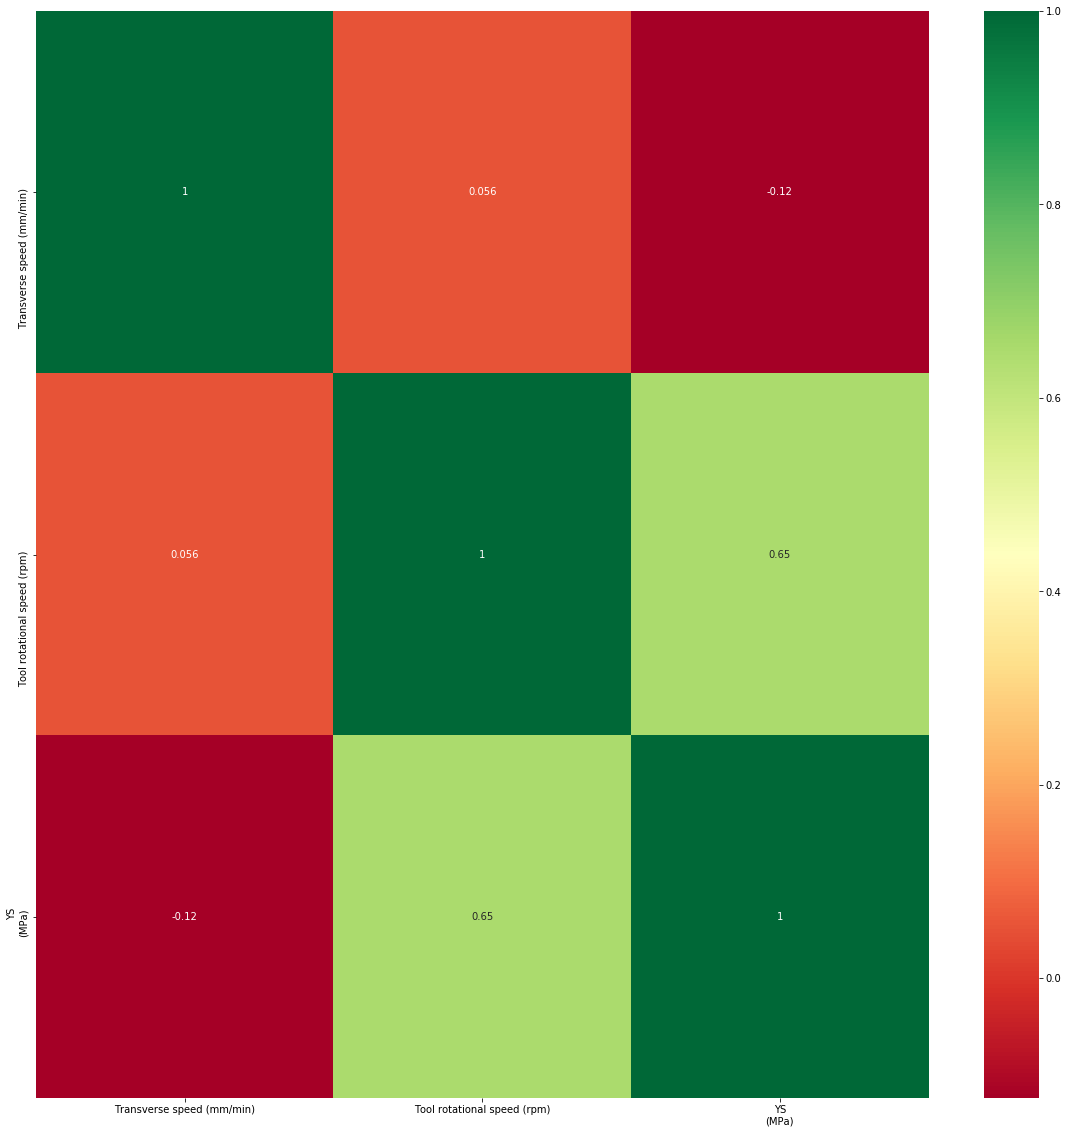

In [13]:
cormat=df.corr()
top_corr_features = cormat.index
plt.figure(figsize=(20,20))
#plot heatmap
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [14]:
## Segregate the independent(X) and dependent features(y)
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
X.head()

,Transverse speed (mm/min),Tool rotational speed (rpm)
0,45,540
1,54,540
2,63,540
3,45,720
4,54,720


In [16]:
y.head()

0    85.5
1    80.1
2    81.9
3    73.8
4    82.8
Name: YS\n(MPa), dtype: float64

In [17]:
## Feature Importance : to find out the important features in the dataframe
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

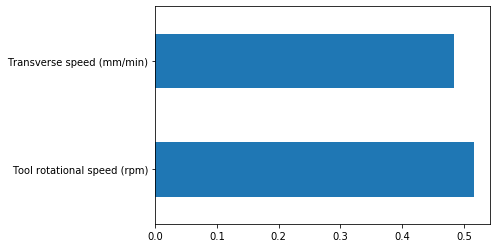

In [18]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [20]:
X_train.shape

(23, 2)

In [21]:
X_test.shape

(6, 2)

# Random Forest Regression Algorithm

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [23]:
## Custom Setup the Hyperparameters for the model training using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [25]:
## Use the random grid to search the best parameter
## First create the base model
rf = RandomForestRegressor()

In [26]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [27]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [28]:
predictions = rf_random.predict(X_test)

In [29]:
predictions

array([107.44547157, 120.30684325, 122.374215  ,  80.791985  ,
        92.00110019, 122.74206006])

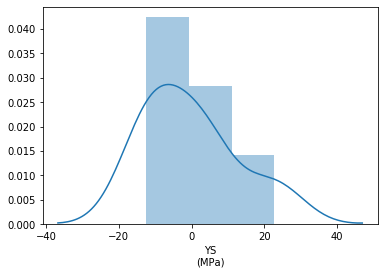

In [30]:
sns.distplot(y_test-predictions)

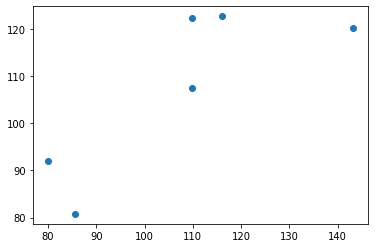

In [31]:
plt.scatter(y_test,predictions)

In [32]:
from sklearn import metrics
import numpy as np
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 10.16217924034303
MSE: 148.5168724442458
RMSE: 12.186749872063748


# Linear Regression Algorithm

In [33]:
## -- Model Building --
# Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [34]:
Prediction_Linear = regressor.predict(X_test)

In [35]:
Prediction_Linear

array([112.2673444 , 131.84029046, 107.94248963,  86.19124481,
        84.01294606, 118.80224066])

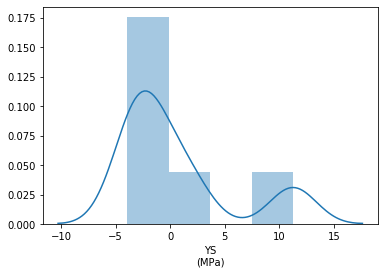

In [36]:
import seaborn as sns
sns.distplot(y_test-Prediction_Linear)

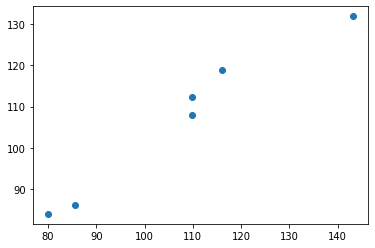

In [37]:
plt.scatter(y_test,Prediction_Linear)

In [38]:
from sklearn import metrics
import numpy as np
print('MAE:',metrics.mean_absolute_error(y_test,Prediction_Linear))
print('MSE:',metrics.mean_squared_error(y_test,Prediction_Linear))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,Prediction_Linear)))

MAE: 3.8151659751037315
MSE: 26.56837717067538
RMSE: 5.154452169792187


# Lasso Regression Algorithm

In [39]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [40]:
lasso = Lasso()
parameters = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\LearningBee\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1723.9215417713842, tolerance: 0.7207784999999999
  positive)
C:\Users\LearningBee\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3812.652447908151, tolerance: 1.010862
  positive)
C:\Users\LearningBee\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4252.210787640063, tolerance: 1.2507704999999998
  positive)
C:\Users\LearningBee\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective di

{'alpha': 10}
-558.6248765255857


In [41]:
prediction_lasso = lasso_regressor.predict(X_test)

In [42]:
prediction_lasso

array([113.25828424, 132.52053427, 106.90966419,  85.80260987,
        83.95780559, 118.79269709])

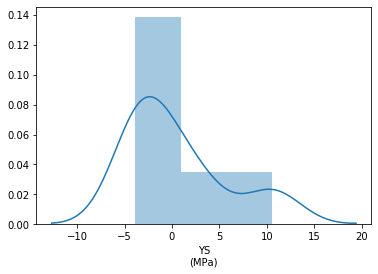

In [43]:
sns.distplot(y_test-prediction_lasso)

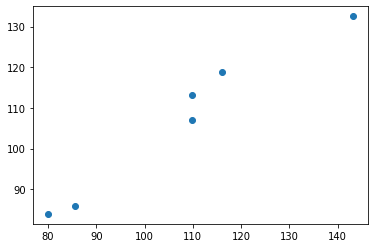

In [44]:
plt.scatter(y_test,prediction_lasso)

In [45]:
from sklearn import metrics
import numpy as np
print('MAE:',metrics.mean_absolute_error(y_test,prediction_lasso))
print('MSE:',metrics.mean_squared_error(y_test,prediction_lasso))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction_lasso)))

MAE: 3.963533054772301
MSE: 25.74395339491969
RMSE: 5.073849957864313


# Ridge Regression Algorithm

In [46]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [47]:
ridge=Ridge()
parameters = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-559.5068423066554


In [48]:
prediction_ridge = ridge_regressor.predict(X_test)

In [49]:
prediction_ridge

array([112.30972744, 131.87188133, 107.89701558,  86.17065568,
        84.00644968, 118.80234545])

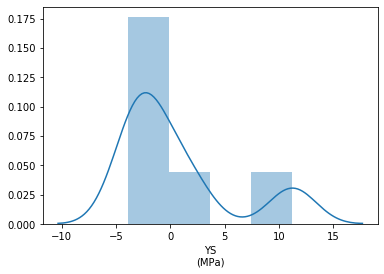

In [51]:
sns.distplot(y_test-prediction_ridge)

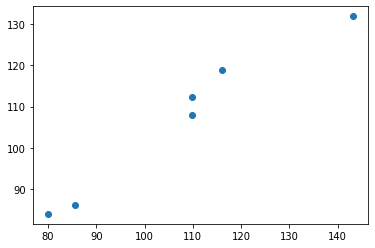

In [52]:
plt.scatter(y_test,prediction_ridge)

In [53]:
from sklearn import metrics
import numpy as np
print('MAE:',metrics.mean_absolute_error(y_test,prediction_ridge))
print('MSE:',metrics.mean_squared_error(y_test,prediction_ridge))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction_ridge)))

MAE: 3.820046891422256
MSE: 26.500588242549487
RMSE: 5.14787220534363
